# Notebook for Paper Comparison Flow

In this example, we will show you how to compare aand contrast two papers from given their markdown files using Google's models via uniflow.

### Before running the code

You will need to `uniflow` conda environment to run this notebook. You can set up the environment following the instruction: https://github.com/CambioML/uniflow/tree/main#installation.

Next, you will need a valid [Google API key](https://ai.google.dev/tutorials/setup) to run the code. Once you have the key, set it as the environment variable `GOOGLE_API_KEY` within a `.env` file in the root directory of this repository. For more details, see this [instruction](https://github.com/CambioML/uniflow/tree/main#api-keys)

### Update system path

In [1]:
%reload_ext autoreload
%autoreload 2

import sys

sys.path.append(".")
sys.path.append("..")
sys.path.append("../..")

## Import dependency

In [3]:
from dotenv import load_dotenv
from IPython.display import display

from uniflow.flow.client import TransformClient
from uniflow.flow.flow_factory import FlowFactory
from uniflow.flow.config  import TransformConfig
from uniflow.op.model.model_config import GoogleModelConfig

from uniflow.viz import Viz
from uniflow.op.prompt import Context

load_dotenv()

True

### Display the different flows

In [4]:
FlowFactory.list()

{'extract': ['ExtractHTMLFlow',
  'ExtractImageFlow',
  'ExtractIpynbFlow',
  'ExtractMarkdownFlow',
  'ExtractPDFFlow',
  'ExtractTxtFlow'],
 'transform': ['TransformAzureOpenAIFlow',
  'TransformCopyFlow',
  'TransformGoogleFlow',
  'TransformGoogleMultiModalModelFlow',
  'TransformHuggingFaceFlow',
  'TransformLMQGFlow',
  'TransformOpenAIFlow',
  'TransformSummaryGoogleFlow'],
 'rater': ['RaterFlow']}

### Prepare Sample Prompts
Use preprocessed raw markdowns for now

In [5]:
with open(r"data/raw_input/paper_1_raw.md", 'r') as file:
    paper_1_content = file.read()

with open(r"data/raw_input/paper_2_raw.md", 'r') as file:
    paper_2_content = file.read()

raw_context_input = [
    paper_1_content,
    paper_2_content,
]
raw_context_input

['# The Impact of Artificial Intelligence on Healthcare: A Review\n\n## Abstract\nArtificial intelligence (AI) has emerged as a transformative technology in healthcare, offering opportunities to improve patient outcomes, streamline processes, and enhance decision-making. This paper provides an overview of the current state of AI in healthcare, explores its applications, benefits, challenges, and future prospects.\n\n## Introduction\nIn recent years, artificial intelligence has gained significant traction across various industries, and healthcare is no exception. With advancements in machine learning, natural language processing, and robotics, AI has the potential to revolutionize healthcare delivery, diagnosis, treatment, and management. This paper aims to delve into the role of AI in healthcare, highlighting its implications, challenges, and future directions.\n\n## Background\nThe integration of AI into healthcare systems has been facilitated by the exponential growth of data, couple

Next, for the given raw text strings `raw_context_input` above, we convert them to the `Context` class to be processed by `uniflow`.

### Run Comparison Flow
In this example, we use the base `Config` defaults with the GoogleModelConfig to generate questions and answers.

In [6]:
data = [[Context(Context=raw_context_input[0]), Context(Context=raw_context_input[1])]]

config = TransformConfig(
    flow_name="TransformSummaryGoogleFlow",
    model_config=GoogleModelConfig()
)
client = TransformClient(config)

In [7]:
output = client.run(data)
paragraph = ''
label_list = ["1-Abstract", "2-Introduction", "3-Background", "4-Approach", "5-Experiment or Result", "6-Conclusion or Future work"]

for inner_output, cat in zip(output[0]['output'], label_list):
    print(cat + '\n\n' + inner_output['response'][0])
    paragraph += cat + '\n\n' + inner_output['response'][0] + '\n\n' 
paragraph

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [03:33<00:00, 213.54s/it]

1-Abstract

**Similarities:**

* Both papers discuss the potential benefits of emerging technologies in their respective fields.
* Both papers acknowledge the challenges associated with the adoption of these technologies.
* Both papers emphasize the importance of ethical considerations and responsible use of these technologies.

**Differences:**

* **Topic:** Paper A focuses on the applications of Artificial Intelligence (AI) in healthcare, while Paper B focuses on the impact of renewable energy adoption on global carbon emissions.
* **Scope:** Paper A provides a broad overview of the potential benefits of AI in various aspects of healthcare, while Paper B focuses specifically on the environmental impact of renewable energy adoption.
* **Methodology:** Paper A does not mention specific research methods or data analysis, while Paper B uses empirical data and modeling techniques to demonstrate the impact of renewable energy adoption on carbon emissions.
* **Target Audience:** Paper A is 

'1-Abstract\n\n**Similarities:**\n\n* Both papers discuss the potential benefits of emerging technologies in their respective fields.\n* Both papers acknowledge the challenges associated with the adoption of these technologies.\n* Both papers emphasize the importance of ethical considerations and responsible use of these technologies.\n\n**Differences:**\n\n* **Topic:** Paper A focuses on the applications of Artificial Intelligence (AI) in healthcare, while Paper B focuses on the impact of renewable energy adoption on global carbon emissions.\n* **Scope:** Paper A provides a broad overview of the potential benefits of AI in various aspects of healthcare, while Paper B focuses specifically on the environmental impact of renewable energy adoption.\n* **Methodology:** Paper A does not mention specific research methods or data analysis, while Paper B uses empirical data and modeling techniques to demonstrate the impact of renewable energy adoption on carbon emissions.\n* **Target Audience:

### View the output

Let's take a look of the generated output.

### Plot model flow graph
Here, we visualize the model flow graph for the `ModelFlow`.

In [8]:
output

[{'output': [{'response': ['**Similarities:**\n\n* Both papers discuss the potential benefits of emerging technologies in their respective fields.\n* Both papers acknowledge the challenges associated with the adoption of these technologies.\n* Both papers emphasize the importance of ethical considerations and responsible use of these technologies.\n\n**Differences:**\n\n* **Topic:** Paper A focuses on the applications of Artificial Intelligence (AI) in healthcare, while Paper B focuses on the impact of renewable energy adoption on global carbon emissions.\n* **Scope:** Paper A provides a broad overview of the potential benefits of AI in various aspects of healthcare, while Paper B focuses specifically on the environmental impact of renewable energy adoption.\n* **Methodology:** Paper A does not mention specific research methods or data analysis, while Paper B uses empirical data and modeling techniques to demonstrate the impact of renewable energy adoption on carbon emissions.\n* **Tar

In [9]:
graph = Viz.to_digraph(output[0]['root'])

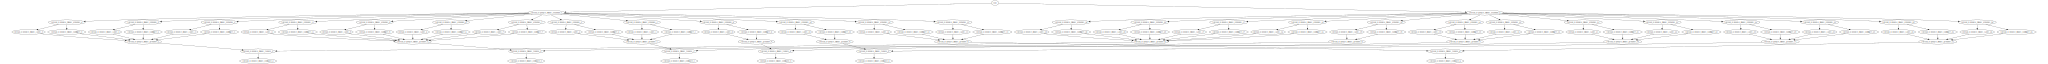

In [10]:
display(graph)